In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Forecast
import Date

In [2]:
## date in    %month / %day / %year    ##

def getCOOLdemand(datewanted):
    
    [T, UV] = Forecast.forecastF(datewanted)
    
    T = pd.DataFrame(T)
    
    T.columns = ['Temp (°C)']
    
    T.rename(index={0:'00:00',1:'01:00',2:'02:00',3:'03:00',4:'04:00',5:'05:00',6:'06:00',7:'07:00',8:'08:00',9:'09:00',10:'10:00',11:'11:00',12:'12:00',13:'13:00',14:'14:00',15:'15:00',16:'16:00',17:'17:00',18:'18:00',19:'19:00',20:'20:00',21:'21:00',22:'22:00',23:'23:00'}, inplace=True)
    
    T['const'] = [22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22]
    
    T['diff'] = T['Temp (°C)']-T['const']
    
    T['Degree Days'] = T['diff']*(1/24)
    
    T['Cooling Demand (kWh)'] = T['Degree Days']*235.5
    
    ## including the internal heat sources
    
    T['Cooling Demand (kWh)'] = T['Cooling Demand (kWh)']+50
    
    ## including the internal heat sources
    
    T['Cooling Demand (kWh)'] = T['Cooling Demand (kWh)'].clip(lower=0)
    
    T = T.drop(['Temp (°C)','const','diff','Degree Days'], axis = 1);
    
    return T


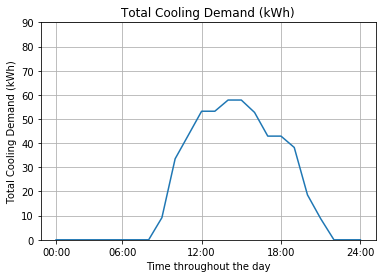

In [13]:
## date in    %month / %day / %year    ## 
daywanted = 184
datewanted = Date.getdatewanted(daywanted)
cooldemand = getCOOLdemand(datewanted)

plt.plot(cooldemand)
plt.xlabel('Time throughout the day')
plt.ylabel('Total Cooling Demand (kWh)')
plt.title('Total Cooling Demand (kWh)')
plt.xticks((0,5,11,17,23),('00:00','06:00','12:00','18:00','24:00'))
plt.ylim(ymin=0, ymax=90)
plt.grid()
plt.show()

In [14]:
datewanted

'07/03/2018'

In [4]:

def getyearlycooldemand():

#     for q in range(1,90):
# #         for some reason when q=90 there is an error (maybe to do with leap year)

# #         if q == 90:
# #             for n in range(24):
# #                 yearlycooldemand[n+(q-1)*24] = cooldemand.iloc[n, 0]
# #             continue

#         datewanted = Date.getdatewanted(q)

#         cooldemand = getCOOLdemand(datewanted)

#         for n in range(24):
#             yearlycooldemand[n+(q-1)*24] = cooldemand.iloc[n, 0]
            
    
    for q in range(365,366):
#         for some reason when q=90 there is an error (maybe to do with leap year)

#         if q == 90:
#             for n in range(24):
#                 yearlycooldemand[n+(q-1)*24] = cooldemand.iloc[n, 0]
#             continue

        datewanted = Date.getdatewanted(q)

        cooldemand = getCOOLdemand(datewanted)

        for n in range(24):
            yearlycooldemand[n+(q-1)*24] = cooldemand.iloc[n, 0]
            
    return yearlycooldemand

In [5]:
# yearlycooldemand = np.zeros(365*24)
# demand = getyearlycooldemand()

In [6]:
# plt.plot(yearlycooldemand)

In [7]:
# demand

In [8]:
# demand.hello